# The Grammar of Graphics: R Ladies

**By [Christine Zhang](https://twitter.com/christinezhang)**

*RLadies Meetup at UCLA: April 16, 2017*

This workshop is a basic introduction to the `R` library, `ggplot2`. 

`ggplot2` is a data visualization package for `R` developed by [Hadley Wickham](https://twitter.com/hadleywickham) that provides a structured approach to graphing. As he wrote in 2012:

> The emphasis in `ggplot2` is reducing the amount of thinking time by making it easier to go from the plot in your brain to the plot on the page."

The philosophy behind `ggplot2` is based on Leland Wilkinson's [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448).

Hurricane Katrina was a devastating natural disaster that substantially affected the population of New Orleans. The hurricane took place in August 2005, which coincidentally falls between the U.S. Census full population counts in 2000 and 2010.

In this session, we will use 2000 and 2010 U.S. Census data on population and occupancy for New Orleans. These modified versions of the `census_comparison.csv` file that was created during [another R tutorial](https://github.com/OpenNewsLabs/r-workshop-ire) I co-led in New Orleans, LA. The data were downloaded from the [U.S. Census Bureau website](http://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml).

Here is the beginning of a newspaper story, from [The Times-Picayune]( http://www.nola.com/politics/index.ssf/2011/02/new_orleans_officials_2010_pop.html), released shortly after the 2010 Census data:

> Five years after Hurricane Katrina emptied New Orleans and prompted the largest mass migration in modern American history, **the 2010 Census counted 343,829 people living in the still-recovering city, a 29 percent drop since the last head count a decade ago,** according to data released today.

**In this session, we will:**

- Install and load `ggplot2`
- Load and inspect the data in `R`
- Create some basic graphs using `ggplot2`, including some of the graphs in the Times-Picayune story
- Explore additional features of `ggplot2`

The following code and annotations were written in a Jupyter notebook.

*Related tutorials: Getting started with R + More with R [here](https://github.com/OpenNewsLabs/r-workshop-ire)*

## Load packages

In [1]:
# install.packages('ggplot2')
# install.packages('readr') if not already installed

library('ggplot2')
library('readr')

## Load data

We'll start by using the `read_csv()` command in `readr` to load in the census data, which is stored in a CSV (comma-separated values) file. CSVs are plain-text files of data where commas separate the columns within a line.

We have two datasets, population and occupancy information:

- `orleans.csv`: includes all the Census tracts in the city of New Orleans

- `parishes.csv`: includes all the Parishes (Lousiana lingo for counties) in the state

We save the data to two object called `orleans` and `parish`. Here, we are using assignment with `<-`, which tells `R` to run the right side and assign the result to the object named on the left.


In [2]:
orleans <- read_csv('orleans.csv')
parishes <- read_csv('parishes.csv')

Parsed with column specification:
cols(
  fips.code = col_double(),
  tract = col_character(),
  parish = col_character(),
  state = col_character(),
  population.00 = col_integer(),
  total.housing.units.00 = col_integer(),
  occupied.housing.units.00 = col_integer(),
  vacant.housing.units.00 = col_integer(),
  population.10 = col_integer(),
  total.housing.units.10 = col_integer(),
  occupied.housing.units.10 = col_integer(),
  vacant.housing.units.10 = col_integer()
)
Parsed with column specification:
cols(
  parish = col_character(),
  population.00 = col_integer(),
  total.housing.units.00 = col_integer(),
  occupied.housing.units.00 = col_integer(),
  vacant.housing.units.00 = col_integer(),
  population.10 = col_integer(),
  total.housing.units.10 = col_integer(),
  occupied.housing.units.10 = col_integer(),
  vacant.housing.units.10 = col_integer()
)


Let's inspect the first few rows using `head`, which by default prints out the first six rows of a data frame (R's internal term for a spreadsheet):

In [3]:
head(orleans)

fips.code,tract,parish,state,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10
2.2071e+10,Census Tract 1,Orleans Parish,Louisiana,2381,1408,1145,263,2455,1513,1229,284
2.2071e+10,Census Tract 2,Orleans Parish,Louisiana,1347,691,496,195,1197,738,496,242
2.2071e+10,Census Tract 3,Orleans Parish,Louisiana,1468,719,559,160,1231,641,467,174
2.2071e+10,Census Tract 4,Orleans Parish,Louisiana,2564,1034,873,161,2328,1137,911,226
2.2071e+10,Census Tract 6.01,Orleans Parish,Louisiana,2034,704,506,198,849,328,269,59
2.2071e+10,Census Tract 6.02,Orleans Parish,Louisiana,2957,1106,1011,95,2534,1108,923,185


## Quick plots with q-plot

`qplot()` is a function used in `ggplot2` for quick plots. The syntax is similar to that of base `R`. 

Let's take a look at the relationship between the New Orleans population in 2000 and its population in 2010.

In [ ]:
qplot(population.00, population.10, data = orleans)

This doesn't tell us very much, other than the (intuitive) fact that census tracts with higher populations in 2000 also tended to have higher populations in 2010.

We can better examine the relationship if we draw a 45-degree line with `+abline()`.

If a census tract's population in 2010 was exactly the same as its population in 2000, it would fall on this line. If its 2010 population was lower than its 2000 population, it would fall below this line.

This gives us a quick way to visually inspect the changes in population.

While we're at it, we'll add a title with `+ggtitle()`.

As you can see, adding on elements is part of the "layered" grammar of graphics.


In [ ]:
qplot(population.00, population.10, data = orleans) + 
    geom_abline() + 
    ggtitle('Census Tracts in Orleans Parish')

Most of the time, I use `ggplot2`'s full functionality by calling `ggplot()`, rather than using `qplot()`. 

Let's go through the basic syntax of `ggplot`. A `gggplot2` graph is built up from a few basic elements:

- **Data**: the raw data you want to plot
- **Aesthetics**: including Mapping e.g., which variable is on the x-axis? the y-axis? Should the color/size/position of the plotted data that be mapped to some variable?
- **Geometries**: the geometric shapes that represent the data
- **Statistics**: statistical transformations that are used to summarize the data

*Source: [Hopper (2014)](https://tomhopper.me/2014/03/28/a-simple-introduction-to-the-graphing-philosophy-of-ggplot2/)*

## Scatter plot

We can re-create the above plot using `ggplot()` rather than `qplot()`.

In [ ]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point() +
  geom_abline() +
  ggtitle('Census Tracts in Orleans Parish')

What if we wanted to end the x-axis and y-axis at 8000?

In [ ]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point() +
  geom_abline() +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000))

What if we wanted to end the y-axis to be labele in increments of 1000, instead of 2000?

In [ ]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point() +
  geom_abline() +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

Now let's add some color. We can color the points by Census tract by adding a `color = blue` parameter to `geom_point()`:

Warning message:
“Removed 64 rows containing missing values (geom_point).”

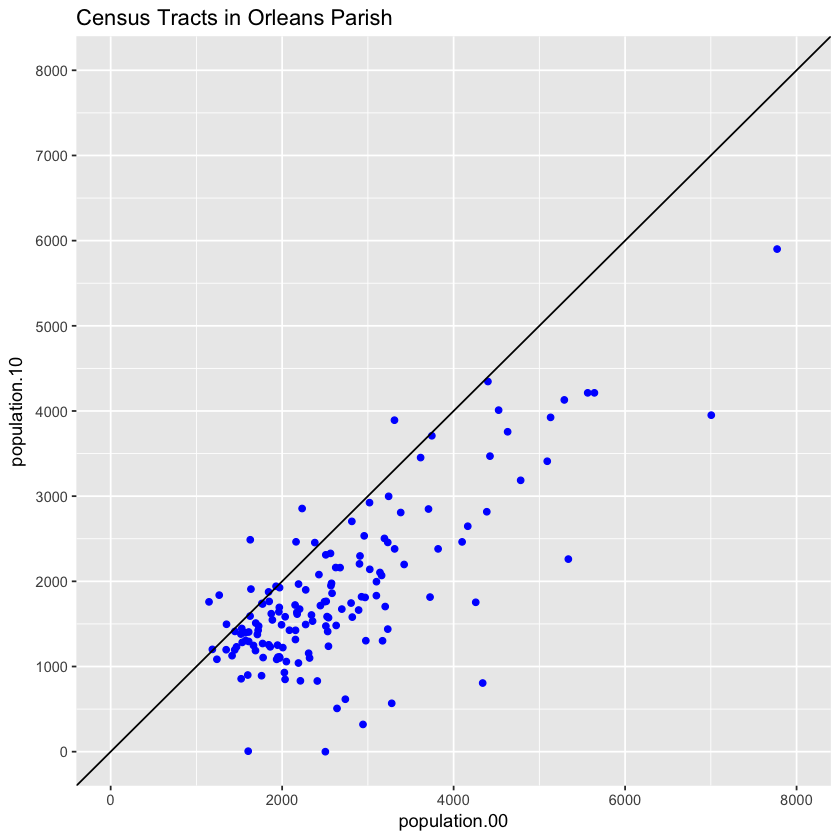

In [6]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point(color = 'blue') +
  geom_abline() +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

## Line graph

Let's remove the diagonal line and explore how to fit a curve instead.

What if we tried to add `geom_line()`?

Warning message:
“Removed 64 rows containing missing values (geom_point).”Warning message:
“Removed 49 rows containing missing values (geom_path).”

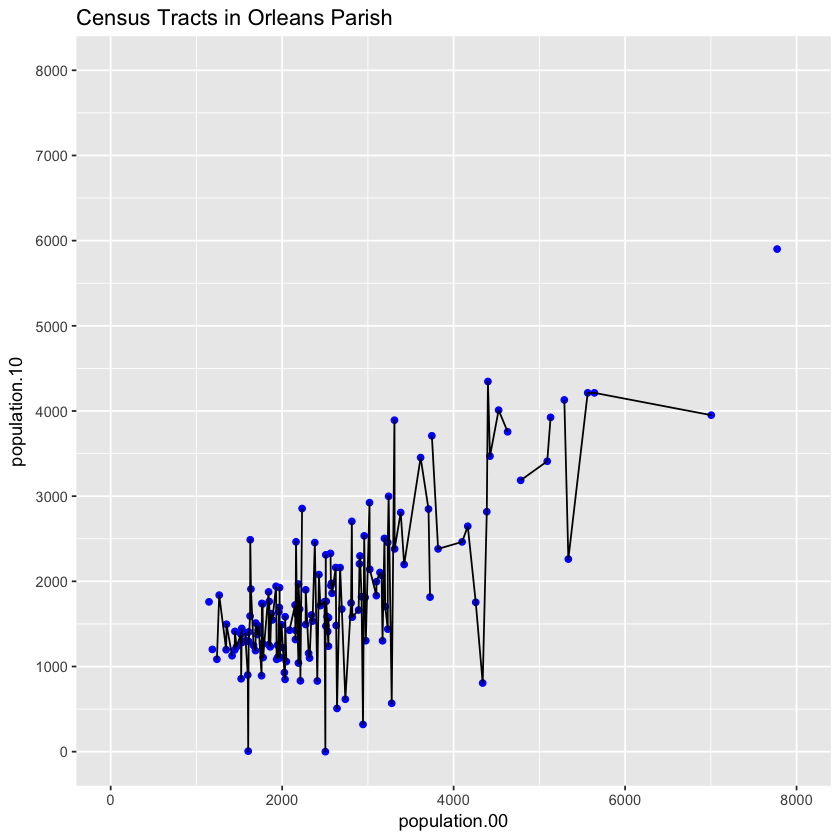

In [22]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point(color = 'blue') +
  geom_line() +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

We can't use `geom_line()`, because we need to fit a smoothed curve. This is done using `geom_smooth()`.

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 64 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 64 rows containing missing values (geom_point).”

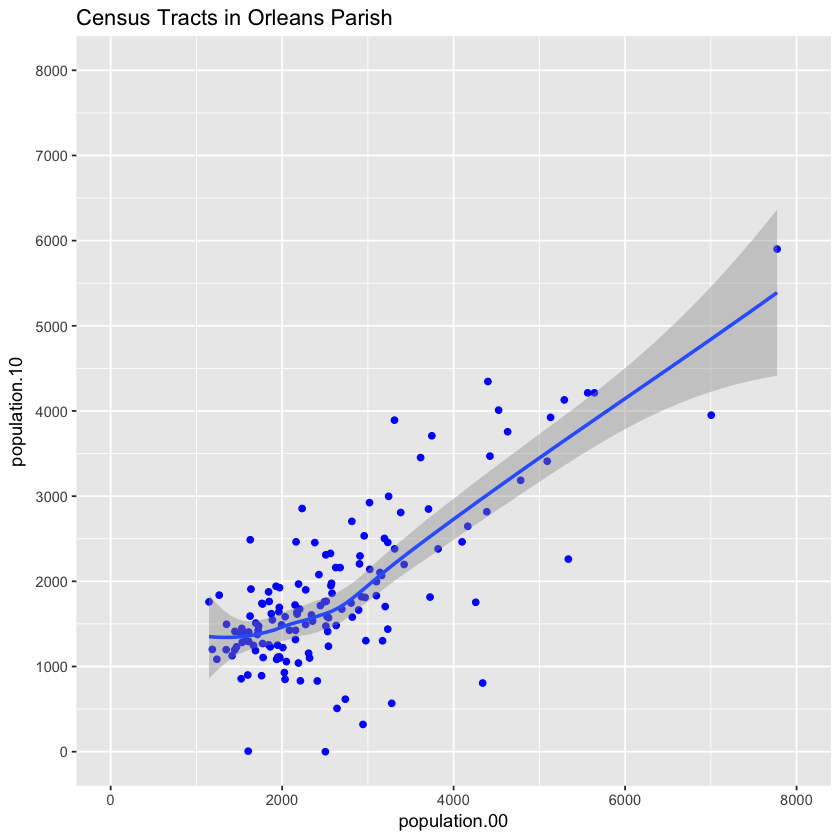

In [25]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point(color = 'blue') +
  geom_smooth() +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

The default method for the fitted curve is loess, but we can specify a linear fit by including the parameter, `method = 'lm'`. While we're at it, we can suppress the 95% confidence interval with `se = FALSE`. Keep in mind that since these are characteristics of the line, `geom_line()`, they go inside the `geom_line()` parenthesis.

Warning message:
“Removed 64 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 64 rows containing missing values (geom_point).”

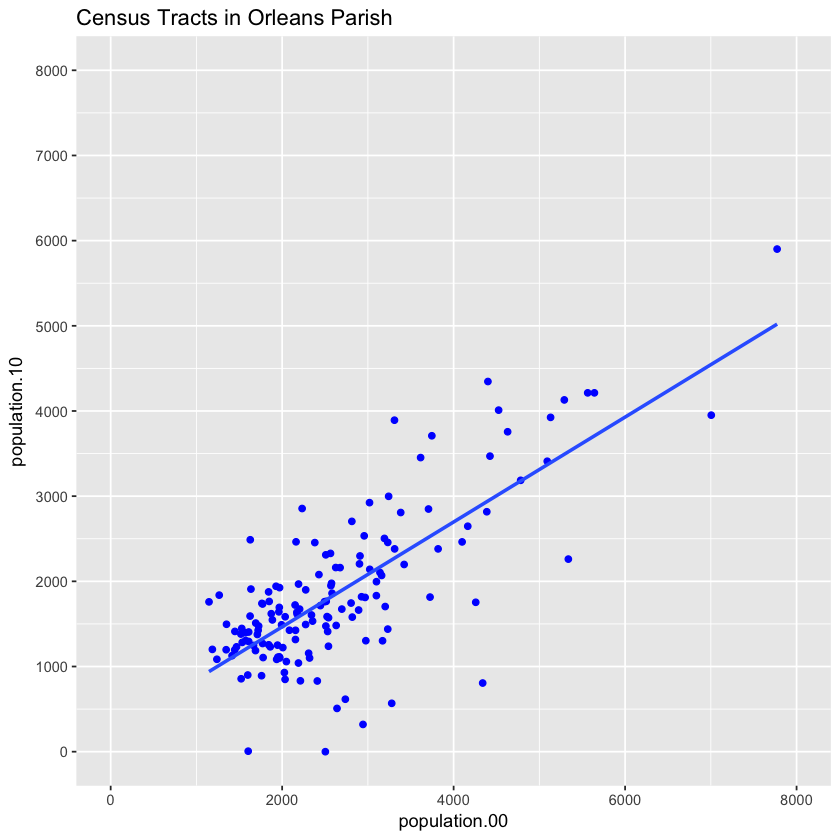

In [26]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point(color = 'blue') +
  geom_smooth(method = 'lm', se = FALSE) +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

Let's add color in a different way. What if we wanted to color, say the census tracts with lower 2010 population than 2000 population. 

First, we need to create a variable, `pop.diff`, which represents the diffence between the two:

In [7]:
orleans$pop.diff <- orleans$population.10 - orleans$population.00

Then, we create an indicator variable, `pop.decrease` that will take the value `decrease` if `orleans$pop.diff` is negative -- that is, if there's a population decrease and `increase` if `orleans$pop.diff` is positive -- that is, if there's a population increase.

In [15]:
orleans$pop.decrease <- ifelse(orleans$pop.diff < 0, 'decrease', 'increase')

We now map this variable to `geom_point()` using `aes()`. Note the use of `aes()`, since the points are colored according to the `pop.diff` variable.

Warning message:
“Removed 64 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 64 rows containing missing values (geom_point).”

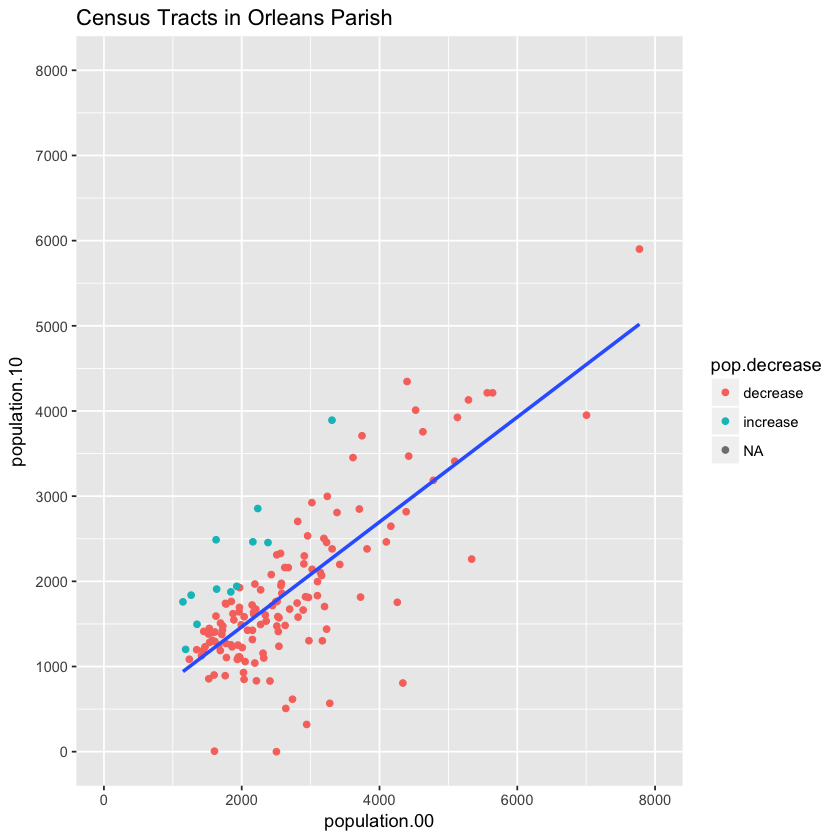

In [27]:
ggplot(data = orleans, 
       aes(x = population.00, 
           y = population.10)) + 
  geom_point(aes(color = pop.decrease)) +
  geom_smooth(method = 'lm', se = FALSE) +
  ggtitle('Census Tracts in Orleans Parish') +
  scale_x_continuous(limits = c(0, 8000)) +
  scale_y_continuous(limits = c(0, 8000), breaks = seq(0, 8000, 1000))

## Bar chart

For the bar chart, we will attempt to recreate the bar graph in the Times-Picayune staory of the most populous parishes: ![image](mostpopulous.jpg)

To do this, we need to use our `parishes` data frame.

In [34]:
head(parishes)

parish,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10
Acadia Parish,58861,23209,21142,2067,61773,25387,22841,2546
Allen Parish,25440,9157,8102,1055,25764,9733,8516,1217
Ascension Parish,76627,29172,26691,2481,107215,40784,37790,2994
Assumption Parish,23388,9635,8239,1396,23421,10351,8736,1615
Avoyelles Parish,41481,16576,14736,1840,42073,18042,15432,2610
Beauregard Parish,32986,14501,12104,2397,35654,15040,13159,1881


The relevant variable here is `population.10`, or population in 2010. We will need to sort the data by this variable from highest to lowest. We can to this in base `R` using `order`

In [38]:
sorted <- parishes[order(-parishes$population.10),] 
head(sorted)

parish,population.00,total.housing.units.00,occupied.housing.units.00,vacant.housing.units.00,population.10,total.housing.units.10,occupied.housing.units.10,vacant.housing.units.10
East Baton Rouge Parish,412852,169073,156365,12708,440171,187353,172057,15296
Jefferson Parish,455466,187907,176234,11673,432552,189135,169647,19488
Orleans Parish,484674,215091,188251,26840,343829,189896,142158,47738
Caddo Parish,252161,108296,97974,10322,254969,112028,102139,9889
St. Tammany Parish,191268,75398,69253,6145,233740,95412,87521,7891
Lafayette Parish,190503,78122,72372,5750,221578,93656,87027,6629


We can use `subset()` to see that the Parishes and corresponding populations match up.

In [40]:
head(subset(sorted, select = c(parish, population.10)))

parish,population.10
East Baton Rouge Parish,440171
Jefferson Parish,432552
Orleans Parish,343829
Caddo Parish,254969
St. Tammany Parish,233740
Lafayette Parish,221578


Let's try using `geom_bar()`

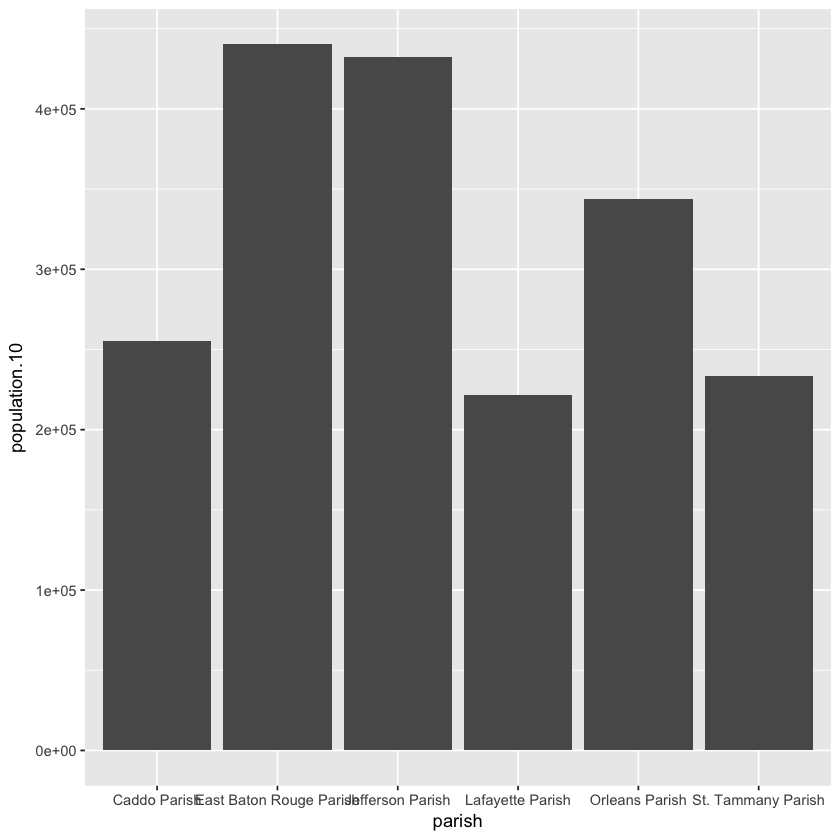

In [41]:
ggplot(data = head(sorted), 
       aes(x = parish, 
           y = 	population.10)) +
  geom_bar(stat = 'identity')

We need to rearrange the Parishes in the order they appear in the data frame. We can do this by creating a factor variable for Parish called `parish.2` that will be ordered appropriately.

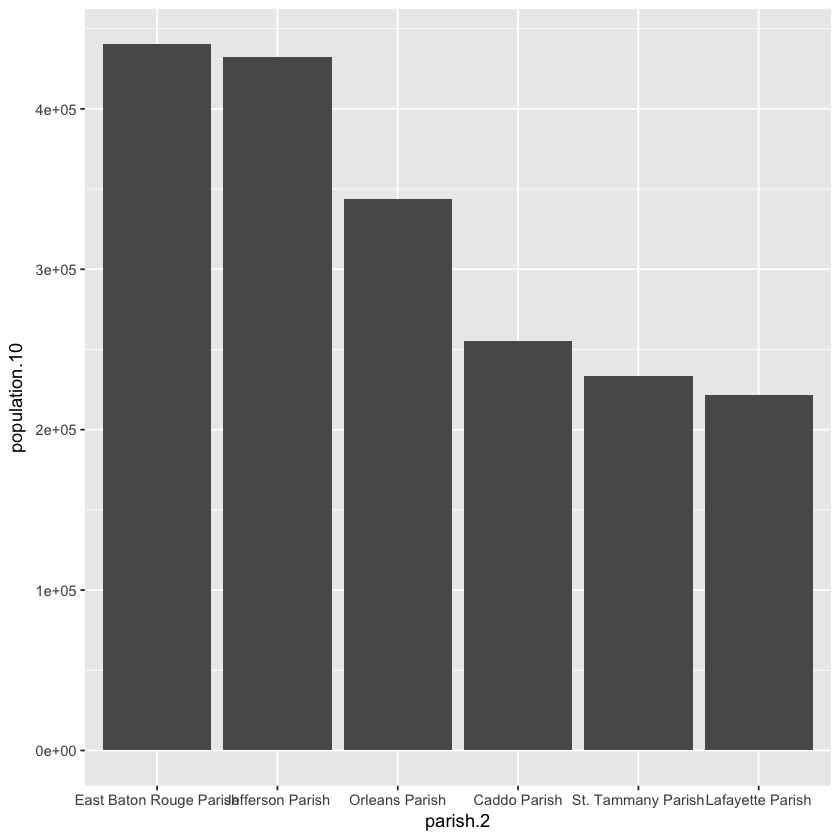

In [51]:
sorted$parish.2 <- factor(sorted$parish, 
                          levels = unique(as.character(sorted$parish)))


ggplot(data = head(sorted), 
       aes(x = parish.2, 
           y = 	population.10)) +
  geom_bar(stat = 'identity')

We can flip the coordinates using `ccord_flip()` and specify just the top 5 Parishes using `head(n = 5)`. Note we will need to reorder the factor variable, `parish.2`

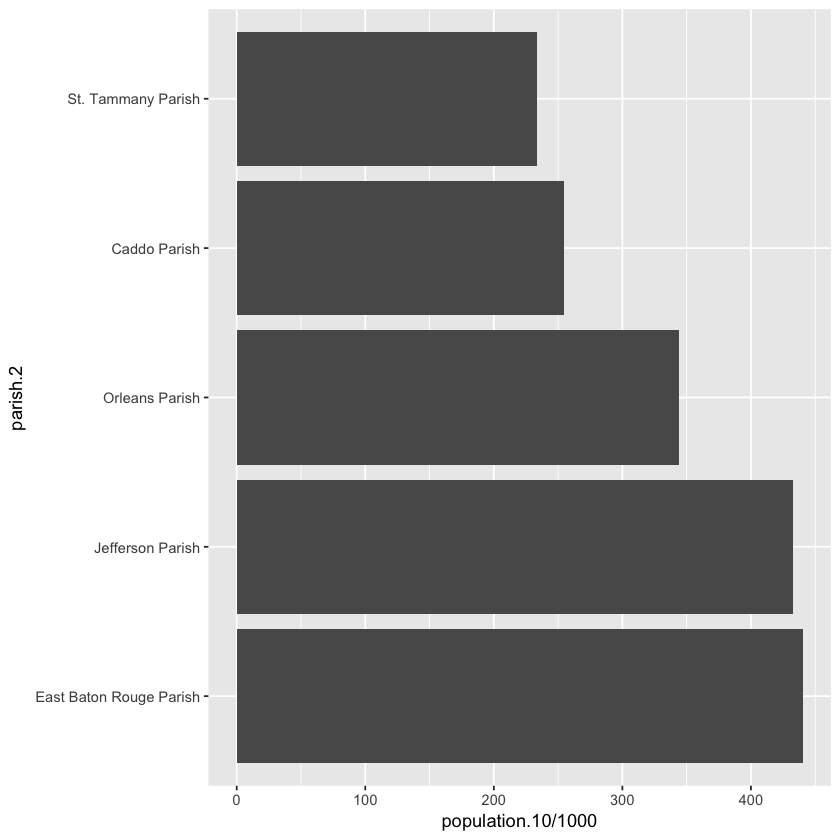

In [60]:
sorted$parish.2 <- factor(sorted$parish.2, levels = rev(levels(sorted$parish.2)))

ggplot(data = head(sorted, n = 5), 
       aes(x = parish.2, 
           y = 	population.10/1000)) +
  geom_bar(stat = 'identity') +
  coord_flip()

This is a basic bar graph. Yay! 

Now it's your turn -- try adding some bells and whistles to this bar graph, like :
- axis labels
- title
- change x-axis limits
- challenge: fill the bars